<a href="https://colab.research.google.com/github/andrinau/andrinau/blob/main/tugaskompstat1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt, seaborn as sns, numpy as np, pandas as pd
sns.set(style="ticks", color_codes=True)

"Done"

'Done'

In [2]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [3]:
# Load data from list to datafame for further processing.
doc = pd.DataFrame({'document':documents})
doc

,document
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."
...,...
11309,"Danny Rubenstein, an Israeli journalist, will ..."
11310,\n
11311,\nI agree. Home runs off Clemens are always m...
11312,I used HP DeskJet with Orange Micros Grappler ...


In [4]:
#menghapus segalanya kecuali letter dan space
clean_doc = doc["document"].str.replace("[^a-zA-Z#]", " ")

#menghapus kata yg berjumlah dibawah 3, berguna untuk to be
clean_doc = clean_doc.apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#menggantikan semua huruf ke huruf kecil
clean_doc = clean_doc.apply(lambda x: x.lower())
clean_doc

0        well sure about story seem biased what disagre...
1        yeah expect people read actually accept hard a...
2        although realize that principle your strongest...
3        notwithstanding legitimate fuss about this pro...
4        well will have change scoring playoff pool unf...
                               ...                        
11309    danny rubenstein israeli journalist will speak...
11310                                                     
11311    agree home runs clemens always memorable kinda...
11312    used deskjet with orange micros grappler syste...
11313    argument with murphy scared hell when came las...
Name: document, Length: 11314, dtype: object

In [5]:
# Load stopwords (here I used Spacy for stopwords you can also use NLTK)
from spacy.lang.en.stop_words import STOP_WORDS as stop_words

# tokenization - break sentences into words
token_doc = clean_doc.apply(lambda x: x.split())

# remove stop-words
token_doc = token_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization - Join words to get back the sentences
detoken_doc = []
for i in range(len(doc)):
    t = ' '.join(token_doc[i])
    detoken_doc.append(t)

clean_doc = detoken_doc

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vsm = CountVectorizer(binary = False, lowercase=True, stop_words='english')

A = vsm.fit_transform(clean_doc)

A.shape # check shape of the document-term matrix

(11314, 64748)

In [7]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(A)

len(svd_model.components_)

20

In [8]:
terms = vsm.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='', flush=True)
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
    print(" ")

Topic 0: file output program entry available information jpeg  
Topic 1: output file entry oname printf stream char  
Topic 2: jpeg image available data version software graphics  
Topic 3: file jpeg congress firearms control image states  
Topic 4: jpeg image color output images format quality  
Topic 5: stephanopoulos president think going package myers george  
Topic 6: widget wire file wiring subject window application  
Topic 7: hockey league team season wire wiring games  
Topic 8: wire wiring jpeg ground neutral privacy internet  
Topic 9: disk drive drives hard bios controller card  
Topic 10: space launch satellite nasa data south commercial  
Topic 11: entry entries jpeg section rules jesus files  
Topic 12: entry entries files graphics info rules space  
Topic 13: space launch jpeg widget satellite application window  
Topic 14: jesus matthew stephanopoulos prophecy atheists christian bible  
Topic 15: south secret rockefeller nuclear military island georgia  
Topic 16: turk

In [9]:
from sklearn.manifold import TSNE
embedding = TSNE(n_components=2).fit_transform(A)

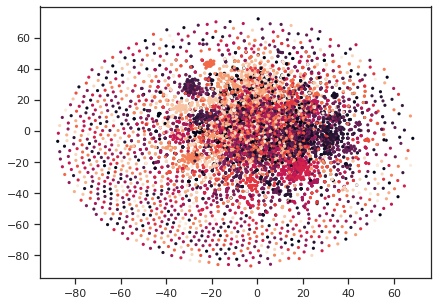

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()